In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
original = pd.read_csv('../../data/time_series.csv', index_col=[0])

In [3]:
original.head()

,Name,Gold,Silver,Bronze,Total,Year,Location,NOC,Continents
0,USA United States of America,39,41,33,113,2020,TOKYO,United States of America,North America
1,CHN People's Republic of China,38,32,18,88,2020,TOKYO,People's Republic of China,Asia
2,JPN Japan,27,14,17,58,2020,TOKYO,Japan,Asia
3,GBR Great Britain,22,21,22,65,2020,TOKYO,Great Britain,Europe
4,ROC ROC,20,28,23,71,2020,TOKYO,ROC,Asia


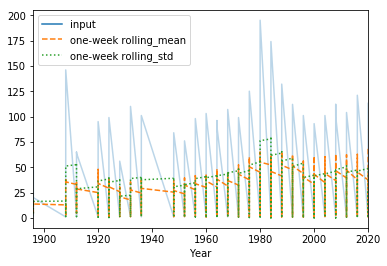

In [4]:
import matplotlib.pyplot as plt
temp_roll = original[["Total", "Year"]]
temp_roll = temp_roll.set_index("Year")
temp_roll = temp_roll["Total"]
rolling = temp_roll.rolling(7, center=True)
data = pd.DataFrame({'input': temp_roll,'one-week rolling_mean': rolling.mean(),'one-week rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

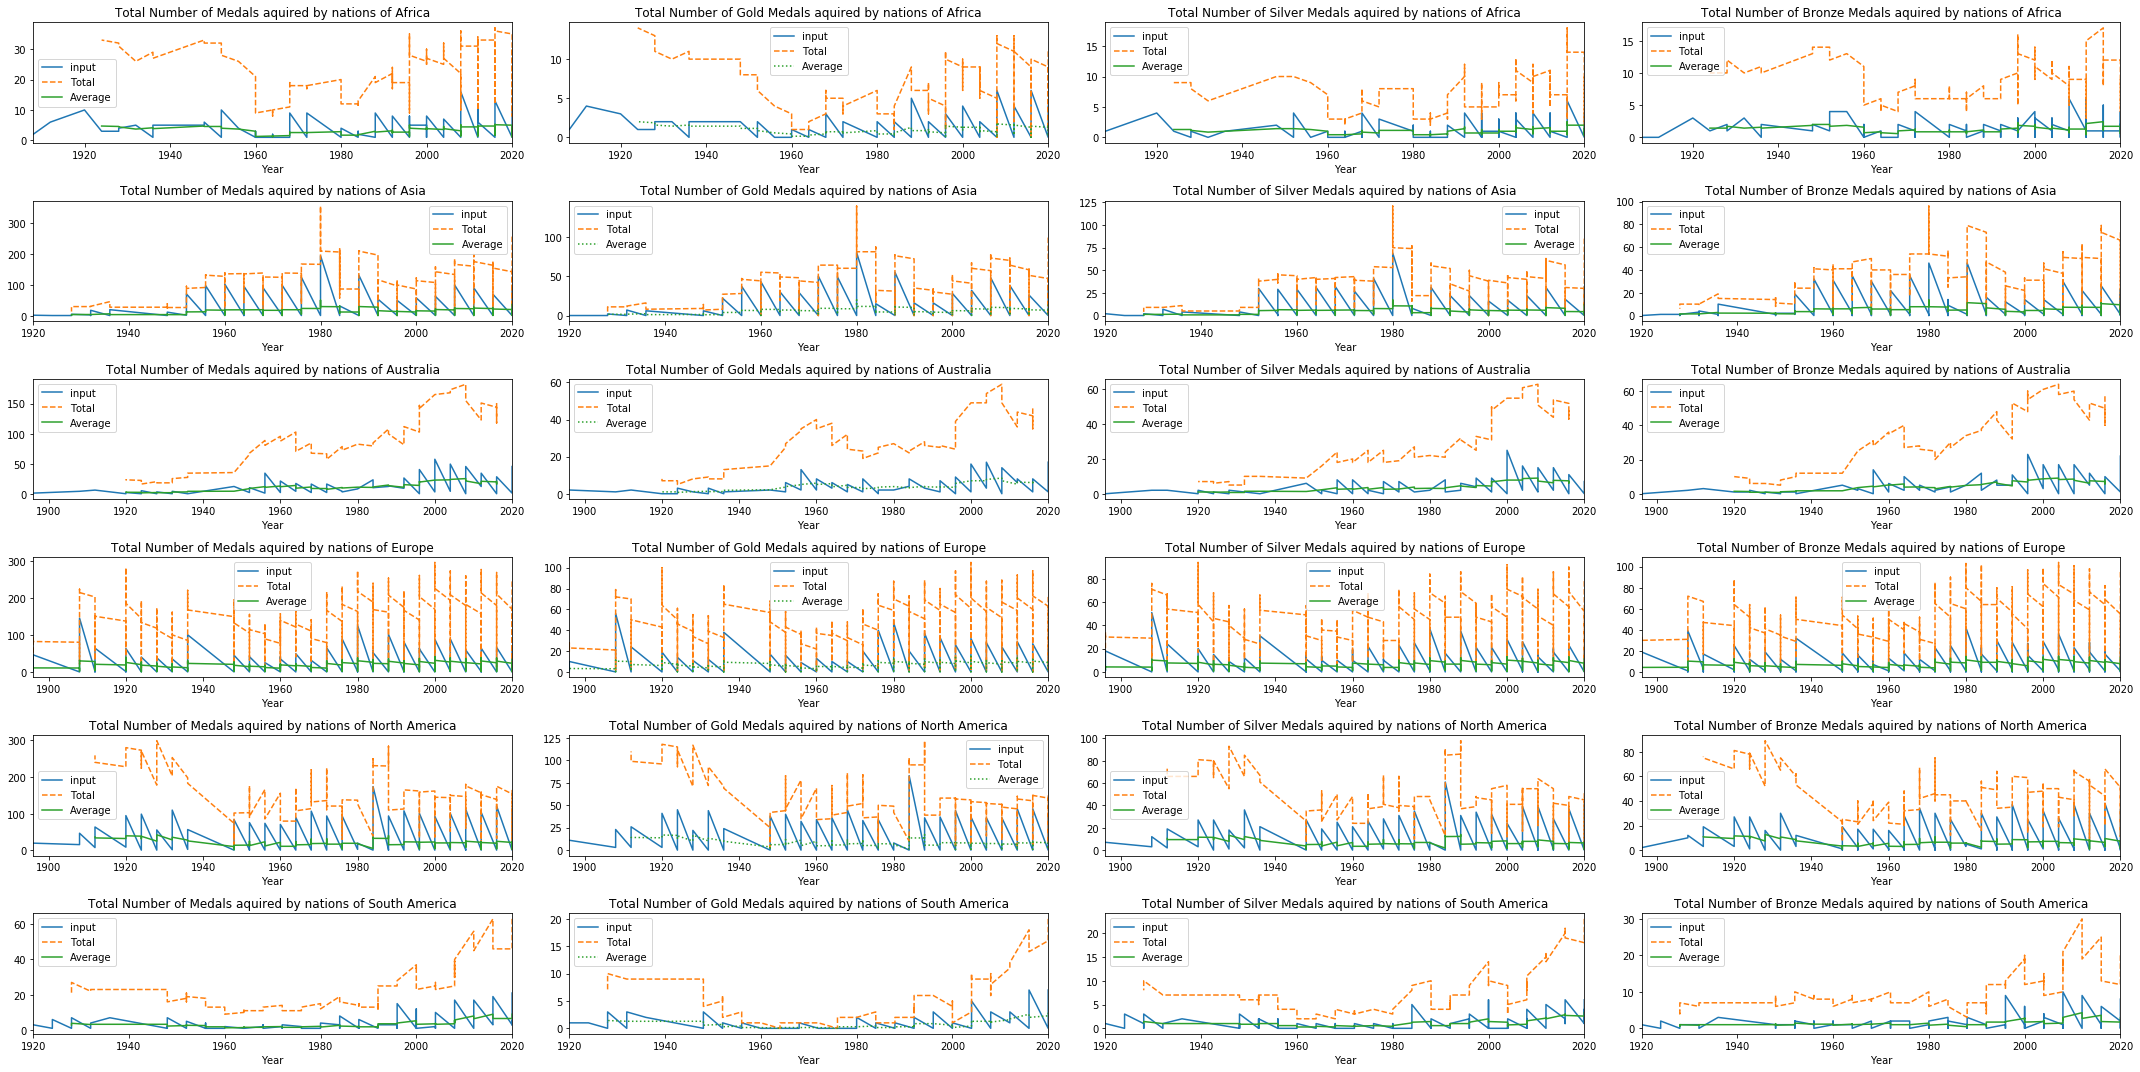

In [5]:
fig, axes = plt.subplots(nrows=6, ncols=4,figsize=(30,15))

continents = 'Africa','Asia','Australia','Europe','North America','South America'
axes_row_total = [0,1,2,3,4,5]
axes_col_total = [0,0,0,0,0,0]
axes_row_total = [0,1,2,3,4,5]
axes_col_total = [0,0,0,0,0,0]

for i in range(0,len(continents)):
    temp = original[original["Continents"] == continents[i]]
    temp_roll = temp[["Total", "Year"]]
    temp_roll = temp_roll.set_index("Year")
    temp_roll = temp_roll["Total"]
    rolling = temp_roll.rolling(7, center=True)
    data = pd.DataFrame({'input': temp_roll,'Total': rolling.sum(),'Average': rolling.mean()})
    data.plot(style=['-', '--'], ax=axes[i,0], title='Total Number of Medals aquired by nations of {}'.format(continents[i]))
    
    ## Gold
    temp_roll = temp[["Gold", "Year"]]
    temp_roll = temp_roll.set_index("Year")
    temp_roll = temp_roll["Gold"]
    rolling = temp_roll.rolling(7, center=True)
    data = pd.DataFrame({'input': temp_roll,'Total': rolling.sum(),'Average': rolling.mean()})
    data.plot(style=['-', '--', ':'], ax=axes[i,1], title='Total Number of Gold Medals aquired by nations of {}'.format(continents[i]))
    
    ## Silver
    temp_roll = temp[["Silver", "Year"]]
    temp_roll = temp_roll.set_index("Year")
    temp_roll = temp_roll["Silver"]
    rolling = temp_roll.rolling(7, center=True)
    data = pd.DataFrame({'input': temp_roll,'Total': rolling.sum(),'Average': rolling.mean()})
    data.plot(style=['-', '--'], ax=axes[i,2], title='Total Number of Silver Medals aquired by nations of {}'.format(continents[i]))
    
    ## Bronze
    temp_roll = temp[["Bronze", "Year"]]
    temp_roll = temp_roll.set_index("Year")
    temp_roll = temp_roll["Bronze"]
    rolling = temp_roll.rolling(7, center=True)
    data = pd.DataFrame({'input': temp_roll,'Total': rolling.sum(),'Average': rolling.mean()})
    data.plot(style=['-', '--'], ax=axes[i,3], title='Total Number of Bronze Medals aquired by nations of {}'.format(continents[i]))
plt.tight_layout()
plt.savefig('../resources/medal_time_series.png')
plt.show()